#### From the Catlab.jl/FreeDiagrams.jl

A [free diagram](https://ncatlab.org/nlab/show/free+diagram) in a category is a
diagram whose shape is a free category. Examples include the empty diagram,
pairs of objects, discrete diagrams, parallel morphisms, spans, and cospans.
Limits and colimits are most commonly taken over free diagrams

_Note_: The objective here is to construct diagram 15 from "Categorical Semantics" and get the pullback equation
shown as P = ...

The code snippets were taken from the CatLab test files:
- [Sets](https://github.com/AlgebraicJulia/Catlab.jl/blob/master/test/categorical_algebra/Sets.jl#L60)
- [CSets](https://github.com/AlgebraicJulia/Catlab.jl/blob/master/test/categorical_algebra/CSets.jl#L133)
- [FinSets](https://github.com/AlgebraicJulia/Catlab.jl/blob/master/test/categorical_algebra/FinSets.jl#L154)

Structure members were obtained from the source code:
- [CSetDataStructures](https://github.com/AlgebraicJulia/Catlab.jl/blob/master/src/categorical_algebra/CSetDataStructures.jl)
- [CSets](https://github.com/AlgebraicJulia/Catlab.jl/blob/master/src/categorical_algebra/CSets.jl)
- [Limits](https://github.com/AlgebraicJulia/Catlab.jl/blob/master/src/categorical_algebra/Limits.jl)
- [FreeDiagrams](https://github.com/AlgebraicJulia/Catlab.jl/blob/master/src/categorical_algebra/FreeDiagrams.jl)

Other:
- [Applied compositional thinking for engineers](https://applied-compositional-thinking.engineering/lectures/)

---
# Pullback


### 1. Cset

In [1]:
using Catlab, Catlab.Theories, Catlab.Graphs, Catlab.CategoricalAlgebra, Catlab.CategoricalAlgebra.FinSets
using Catlab.Graphs.BasicGraphs: TheoryGraph
using Catlab.Present
using Catlab.Graphics

In [2]:
g0, g1, g2 = Graph(2), Graph(3), Graph(2)
add_edges!(g0, [1,1,2], [1,2,2])
add_edges!(g1, [1,2,3], [2,3,3])
add_edges!(g2, [1,2,2], [1,2,2])
ϕ = CSetTransformation((V=[1,2,2], E=[2,3,3]), g1, g0)
ψ = CSetTransformation((V=[1,2], E=[1,3,3]), g2, g0);

In [ ]:
#CSetTransformation(components, X::AbstractCSet, Y::AbstractCSet) = ACSetTransformation(components, X, Y)

#@auto_hash_equals struct ACSetTransformation{CD <: CatDesc, AD <: AttrDesc{CD},
#    Comp <: NamedTuple, Dom <: AbstractACSet{CD,AD}, Codom <: AbstractACSet{CD,AD}}
#  components::Comp
#  dom::Dom
#  codom::Codom
#    # Inner constructor
#end

In [3]:
to_graphviz(g0)

In [4]:
to_graphviz(g1)

In [5]:
to_graphviz(g2)

In [6]:
lim = pullback(ϕ, ψ);

In [ ]:
#@auto_hash_equals struct Limit{Ob,Diagram,Cone<:Multispan{Ob}} <:
#    AbstractLimit{Ob,Diagram}
#  diagram::Diagram
#  cone::Cone
#end

In [7]:
to_graphviz(ψ.codom)

In [8]:
to_graphviz(ψ.dom)

In [9]:
to_graphviz(ϕ.codom)

In [10]:
to_graphviz(ϕ.dom)

In [11]:
typeof(lim.diagram);

In [ ]:
#struct CompositePullback{Ob, Diagram<:Multicospan, Cone<:Multispan{Ob},  
#    Prod<:Product, Eq<:Equalizer} <: AbstractLimit{Ob,Diagram}  
#  diagram::Diagram  
#  cone::Cone  
#  prod::Prod  
#  eq::Eq  
#end

In [ ]:
#@auto_hash_equals struct Multicospan{Ob,Hom,Legs<:AbstractVector{Hom}} <:
#    FixedShapeFreeDiagram{Ob}
#  apex::Ob
#  legs::Legs
#end

In [ ]:
#CSetTransformation(X::AbstractCSet, Y::AbstractCSet; components...) =
#  ACSetTransformation(X, Y; components...)

#@auto_hash_equals struct ACSetTransformation{CD <: CatDesc, AD <: AttrDesc{CD},
#    Comp <: NamedTuple, Dom <: AbstractACSet{CD,AD}, Codom <: AbstractACSet{CD,AD}}
#  components::Comp
 # dom::Dom
 # codom::Codom

In [12]:
typeof( lim.diagram.legs[1] );

In [13]:
to_graphviz(lim.diagram.legs[1].dom)

In [14]:
to_graphviz(lim.diagram.legs[2].dom)

In [15]:
to_graphviz(lim.diagram.legs[1].codom)

In [16]:
to_graphviz(lim.diagram.legs[2].codom)

In [17]:
to_graphviz( lim.diagram.apex )

In [ ]:
#@auto_hash_equals struct Multispan{Ob,Hom,Legs<:AbstractVector{Hom}} <:
#    FixedShapeFreeDiagram{Ob}
#  apex::Ob
#  legs::Legs
#end

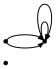

In [18]:
to_graphviz( lim.cone.apex )

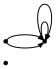

In [19]:
to_graphviz( lim.cone.legs[1].dom )

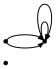

In [20]:
to_graphviz( lim.cone.legs[2].dom )

In [21]:
to_graphviz( lim.cone.legs[1].codom )

In [22]:
to_graphviz( lim.cone.legs[2].codom )

In [50]:
# Undefined values
# prod::Prod
# eq::Eq

---

### 2. Finite Sets

In [23]:
using Catlab.Theories, Catlab.CategoricalAlgebra
using Catlab.CategoricalAlgebra.FinSets

In [24]:
f = FinFunction([1,1,3,2],4)
g = FinFunction([1,1,4,2],4)

lim = pullback(f,g);

In [25]:
lim.cone.legs

2-element StaticArrays.SVector{2, Catlab.CategoricalAlgebra.Sets.SetFunctionCallable{Int64, Int64, FinSet{Int64, Int64}, FinSet{Int64, Int64}}} with indices SOneTo(2):
 FinFunction(ComposedFunction, FinSet(5), FinSet(4))
 FinFunction(ComposedFunction, FinSet(5), FinSet(4))

In [26]:
lim.cone.apex

FinSet(5)

In [27]:
lim.diagram.legs

2-element StaticArrays.SVector{2, Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, FinSet{Int64, Int64}}} with indices SOneTo(2):
 FinFunction([1, 1, 3, 2], 4, 4)
 FinFunction([1, 1, 4, 2], 4, 4)

---
# C-set test


In [28]:
using Catlab.Graphs
using Catlab.Graphics
using Catlab.Theories

In [29]:
h = Graph(3)
add_edges!(h, [1,2], [3,3]);

In [30]:
h

E,src,tgt
1,1,3
2,2,3


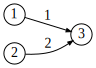

In [31]:
to_graphviz(h, node_labels=true, edge_labels=true)

---
# Limit test

### 1. Free Diagrams

In [32]:
diagram = FreeDiagram([g1, g2, g0], [(ϕ,1,3), (ψ,2,3)])
lim1 = limit(diagram);

In [33]:
lim1.diagram

ACSet with elements V = 1:3, E = 1:2
┌───┬───────────────────────────────────────────────────────────────────────────
│ V │                                                                          ⋯
├───┼───────────────────────────────────────────────────────────────────────────
│ 1 │ CSet(\n  V = 1:3,\n  E = 1:3,\n  src : E → V = [1, 2, 3],\n  tgt : E → V ⋯
│ 2 │ CSet(\n  V = 1:2,\n  E = 1:3,\n  src : E → V = [1, 2, 2],\n  tgt : E → V ⋯
│ 3 │ CSet(\n  V = 1:2,\n  E = 1:3,\n  src : E → V = [1, 1, 2],\n  tgt : E → V ⋯
└───┴───────────────────────────────────────────────────────────────────────────
                                                                1 column omitted
┌───┬─────┬─────┬───────────────────────────────────────────────────────────────
│ E │ src │ tgt │                                                              ⋯
├───┼─────┼─────┼───────────────────────────────────────────────────────────────
│ 1 │   1 │   3 │ CSetTransformation{CatDesc{(:V, :E), (:src, :tgt), (2, 2), ( ⋯
│ 2 │   2 │   3 │    CSetTransformation{CatDesc{(:V, :E), (:src, :tgt), (2, 2) ⋯
└───┴─────┴─────┴───────────────────────────────────────────────────────────────
                                                                1 column omitted

---
### 2. Free Category

In [34]:
using Catlab.CategoricalAlgebra.Limits

In [35]:
A, B, C = Ob(FreeCategory, :A, :B, :C)

3-element Vector{Catlab.Theories.FreeCategory.Ob{:generator}}:
 A
 B
 C

In [36]:
f, g = Hom(:f, C, A), Hom(:g, C, B)

(f, g)

In [44]:
# ObjectPair(first, second) = DiscreteDiagram(SVector(first, second))

#@auto_hash_equals struct DiscreteDiagram{Ob,Objects<:AbstractVector{Ob}} <:
#    FixedShapeFreeDiagram{Ob}
#  objects::Objects
#end

In [ ]:
#@auto_hash_equals struct Multicospan{Ob,Hom,Legs<:AbstractVector{Hom}} <:
#    FixedShapeFreeDiagram{Ob}
#  apex::Ob
#  legs::Legs
#end

In [37]:
ObjectPair(A,B).objects

2-element StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Ob{:generator}} with indices SOneTo(2):
 A
 B

In [38]:
Span(f,g).legs

2-element StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Hom{:generator}} with indices SOneTo(2):
 f: C → A
 g: C → B

In [39]:
Span(f,g).apex

C

In [ ]:
#@auto_hash_equals struct Limit{Ob,Diagram,Cone<:Multispan{Ob}} <:
#    AbstractLimit{Ob,Diagram}
#  diagram::Diagram
#  cone::Cone
#end

In [40]:
lim = Limit(ObjectPair(A,B), Span(f,g));   # Creates datastructure, does not used "limit" function.

In [41]:
lim.cone.apex

C

In [42]:
lim.cone.legs

2-element StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Hom{:generator}} with indices SOneTo(2):
 f: C → A
 g: C → B

In [43]:
typeof(lim.diagram)

ObjectPair{Catlab.Theories.FreeCategory.Ob{:generator}, StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Ob{:generator}}} (alias for DiscreteDiagram{Catlab.Theories.FreeCategory.Ob{:generator}, StaticArrays.SArray{Tuple{2}, Catlab.Theories.FreeCategory.Ob{:generator}, 1, 2}})

In [ ]:
# ObjectPair(first, second) = DiscreteDiagram(SVector(first, second))

#@auto_hash_equals struct DiscreteDiagram{Ob,Objects<:AbstractVector{Ob}} <:
#    FixedShapeFreeDiagram{Ob}
#  objects::Objects
#end

In [44]:
lim.diagram.objects

2-element StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Ob{:generator}} with indices SOneTo(2):
 A
 B

---
### 3. Discrete diagram

In [45]:
diag = DiscreteDiagram([A,B])
lim0 = Limit(diag, Span(f,g));

In [46]:
diag.objects

2-element Vector{Catlab.Theories.FreeCategory.Ob{:generator}}:
 A
 B

In [ ]:
#@auto_hash_equals struct Limit{Ob,Diagram,Cone<:Multispan{Ob}} <:
#    AbstractLimit{Ob,Diagram}
#  diagram::Diagram
#  cone::Cone
#end

In [47]:
lim0.diagram

DiscreteDiagram{Catlab.Theories.FreeCategory.Ob{:generator}, Vector{Catlab.Theories.FreeCategory.Ob{:generator}}}(Catlab.Theories.FreeCategory.Ob{:generator}[A, B])

In [48]:
lim0.diagram.objects

2-element Vector{Catlab.Theories.FreeCategory.Ob{:generator}}:
 A
 B

In [49]:
lim0.cone

Multispan{Catlab.Theories.FreeCategory.Ob{:generator}, Catlab.Theories.FreeCategory.Hom{:generator}, StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Hom{:generator}}}(C, Catlab.Theories.FreeCategory.Hom{:generator}[f, g])

In [50]:
lim0.cone.apex

C

In [51]:
lim0.cone.legs

2-element StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Hom{:generator}} with indices SOneTo(2):
 f: C → A
 g: C → B

---
### 4. Finite sets

In [52]:
f = FinFunction([1,1,3,2],4)
g = FinFunction([1,1,4,2],4)

diag = FreeDiagram(Cospan(f, g))

ACSet with elements V = 1:3, E = 1:2
┌───┬───────────┐
│ V │        ob │
├───┼───────────┤
│ 1 │ FinSet(4) │
│ 2 │ FinSet(4) │
│ 3 │ FinSet(4) │
└───┴───────────┘
┌───┬─────┬─────┬─────────────────────────────────┐
│ E │ src │ tgt │                             hom │
├───┼─────┼─────┼─────────────────────────────────┤
│ 1 │   1 │   3 │ FinFunction([1, 1, 3, 2], 4, 4) │
│ 2 │   2 │   3 │ FinFunction([1, 1, 4, 2], 4, 4) │
└───┴─────┴─────┴─────────────────────────────────┘

In [53]:
lim = limit( BipartiteFreeDiagram(Cospan(f, g)) );

In [54]:
lim = limit(diag);

---
# Free diagram test

In [55]:
using Catlab.CategoricalAlgebra.FreeDiagrams

A, B, C, D = Ob(FreeCategory, :A, :B, :C, :D)
f, g, h = Hom(:f, A, C), Hom(:g, B, C), Hom(:h, A, B)

(f, g, h)

In [ ]:
#struct AttributedCSet{CD <: CatDesc, AD <: AttrDesc{CD}, Ts <: Tuple,
#                      Idxed, UniqueIdxed, Tables <: NamedTuple,
#                      Indices <: NamedTuple} <: AbstractACSet{CD,AD,Ts}
#  tables::Tables
#  indices::Indices
#end

In [56]:
diagram = FreeDiagram([A,B,C], [(f,1,3),(g,2,3),(h,1,2)])

ACSet with elements V = 1:3, E = 1:3
┌───┬────┐
│ V │ ob │
├───┼────┤
│ 1 │  A │
│ 2 │  B │
│ 3 │  C │
└───┴────┘
┌───┬─────┬─────┬─────┐
│ E │ src │ tgt │ hom │
├───┼─────┼─────┼─────┤
│ 1 │   1 │   3 │   f │
│ 2 │   2 │   3 │   g │
│ 3 │   1 │   2 │   h │
└───┴─────┴─────┴─────┘

In [57]:
discrete = DiscreteDiagram([A,B,C])
diagram = FreeDiagram(discrete)

V,ob
1,A
2,B
3,C


In [58]:
diagram.tables

(V = Table with 1 column and 3 rows:
     ob
   ┌───
 1 │ A
 2 │ B
 3 │ C, E = Table with 3 columns and 0 rows:
     src  tgt  hom
   ┌──────────────)

In [59]:
diagram.tables[1][1][1]

A

In [60]:
diagram.tables[1][2][1]

B

In [61]:
diagram.indices

(src = [Int64[], Int64[], Int64[]], tgt = [Int64[], Int64[], Int64[]])

In [62]:
diagram.indices[1]

3-element Vector{Vector{Int64}}:
 []
 []
 []

---
# Product

In [63]:
gr = path_graph(Graph, 4)

E,src,tgt
1,1,2
2,2,3
3,3,4


In [64]:
term = Graph(1)
add_edge!(term, 1, 1)

1

In [65]:
lim = product(gr, term);

In [66]:
to_graphviz(gr)

In [67]:
to_graphviz(term)

---
# Miscellaneous functions

In [68]:
f, g = Hom(:f, B, C), Hom(:g, A, C)

(f, g)

In [69]:
msc = Multicospan([f,g])

Multicospan{Catlab.Theories.FreeCategory.Ob{:generator}, Catlab.Theories.FreeCategory.Hom{:generator}, Vector{Catlab.Theories.FreeCategory.Hom{:generator}}}(C, Catlab.Theories.FreeCategory.Hom{:generator}[f, g])

In [70]:
cs = Cospan(f,g)

Multicospan{Catlab.Theories.FreeCategory.Ob{:generator}, Catlab.Theories.FreeCategory.Hom{:generator}, StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Hom{:generator}}}(C, Catlab.Theories.FreeCategory.Hom{:generator}[f, g])

In [71]:
legs(cs)

2-element StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Hom{:generator}} with indices SOneTo(2):
 f: B → C
 g: A → C

In [72]:
feet(cs)

2-element StaticArrays.SVector{2, Catlab.Theories.FreeCategory.Ob{:generator}} with indices SOneTo(2):
 B
 A